# 1.

In [2]:
from sklearn.datasets import load_wine,load_iris  # 붓꽃 데이터를 제외하고 다른 데이터를 불러옵니다.
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

# 데이터셋 불러오기
#data = load_wine()
data = load_iris()
X, y = data.data, data.target

# train_test_split를 이용해 데이터셋을 학습용과 테스트용으로 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 결과 출력 (선택 사항)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

###################################

X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)


# 2.

In [28]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# 1. 데이터셋 불러오기 및 특징 정리
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# 데이터셋 정보
data_info = {
    "Features": diabetes.feature_names,
    "Number of Samples": X.shape[0],
    "Number of Features": X.shape[1],
    "Target Variable": "Progression of diabetes after one year"
}

# data_info
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(309, 10) (133, 10) (309,) (133,)


In [34]:

# 2. 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Linear Regression 모델 학습 및 예측
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)

# 4. Polynomial Regression 모델 학습 및 예측
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)
y_pred_poly = poly_regressor.predict(X_poly_test)


In [33]:

# 5. MSE 계산
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print(data_info, mse_linear, mse_poly)
#####################################

{'Features': ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], 'Number of Samples': 442, 'Number of Features': 10, 'Target Variable': 'Progression of diabetes after one year'} 2821.7509810013107 3168.9304439471757


# 3.

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# 1. 데이터셋 불러오기
iris = load_wine()
X, y = iris.data, iris.target
print(X)
# 2. 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. DecisionTree 모델 학습
decision_tree = RandomForestClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# 4. 예측 및 정확도 계산
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy
##############################


[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


1.0

# 4.

In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

In [8]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:

# 수치형 데이터와 비수치형 데이터로 분류
numeric_features = titanic.select_dtypes(include=['int64', 'float64'])
non_numeric_features = titanic.select_dtypes(exclude=['int64', 'float64'])

# 1번 데이터셋: 수치형 데이터만 포함, 'Survived' 컬럼 제외
X_numeric = numeric_features.drop(columns=['Survived'])
y_numeric = numeric_features['Survived']

# 2번 데이터셋: 비수치형 데이터도 포함하여 전처리
# 비수치형 데이터를 일괄로 처리 (예: 인코딩)
titanic_non_numeric = non_numeric_features.copy()

# 'Sex'와 'Embarked'를 수치형으로 인코딩
titanic_non_numeric['Sex'] = titanic_non_numeric['Sex'].map({'male': 0, 'female': 1})
titanic_non_numeric = pd.get_dummies(titanic_non_numeric, columns=['Embarked'], drop_first=True)
# print(titanic_non_numeric)

# 수치형 데이터와 비수치형 데이터를 결합하여 2번 데이터셋 생성
X_combined = pd.concat([X_numeric, titanic_non_numeric], axis=1)
y_combined = y_numeric  # y 값은 동일

# 비수치형 데이터에서 문자열 칼럼을 제거 (Name, Ticket, Cabin)
X_combined = X_combined.drop(columns=['Name', 'Ticket', 'Cabin'])

# 1번 데이터셋과 2번 데이터셋을 학습 및 테스트 데이터로 구분
X1_train, X1_test, y1_train, y1_test = train_test_split(X_numeric, y_numeric, test_size=0.02, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X_combined, y_combined, test_size=0.02, random_state=42)

print(X1_train.shape, X1_test.shape, X2_train.shape, X2_test.shape)


# NaN 값을 각 열의 평균값으로 대체
X1_train.fillna(X1_train.mean(), inplace=True)
X1_test.fillna(X1_test.mean(), inplace=True)
X2_train.fillna(X2_train.mean(), inplace=True)
X2_test.fillna(X2_test.mean(), inplace=True)



(873, 6) (18, 6) (873, 9) (18, 9)


In [10]:
from sklearn.ensemble import RandomForestClassifier

# 모델 초기화
rf_model_1 = RandomForestClassifier(random_state=42)
rf_model_2 = RandomForestClassifier(random_state=42)

# 1번 데이터셋 학습
rf_model_1.fit(X1_train, y1_train)

# 2번 데이터셋 학습
rf_model_2.fit(X2_train, y2_train)

# 1번 데이터셋 테스트 성능 측정
y1_pred = rf_model_1.predict(X1_test)
# Precision과 Recall 직접 계산
TP_1 = sum((y1_test == 1) & (y1_pred == 1))
FP_1 = sum((y1_test == 0) & (y1_pred == 1))
FN_1 = sum((y1_test == 1) & (y1_pred == 0))

precision_1 = TP_1 / (TP_1 + FP_1) if (TP_1 + FP_1) != 0 else 0
recall_1 = TP_1 / (TP_1 + FN_1) if (TP_1 + FN_1) != 0 else 0

# 2번 데이터셋 테스트 성능 측정
y2_pred = rf_model_2.predict(X2_test)
# Precision과 Recall 직접 계산
TP_2 = sum((y2_test == 1) & (y2_pred == 1))
FP_2 = sum((y2_test == 0) & (y2_pred == 1))
FN_2 = sum((y2_test == 1) & (y2_pred == 0))

precision_2 = TP_2 / (TP_2 + FP_2) if (TP_2 + FP_2) != 0 else 0
recall_2 = TP_2 / (TP_2 + FN_2) if (TP_2 + FN_2) != 0 else 0

# F1 Score 계산 (Precision과 Recall을 사용)
f1_score_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1) if (precision_1 + recall_1) != 0 else 0
f1_score_2 = 2 * (precision_2 * recall_2) / (precision_2 + recall_2) if (precision_2 + recall_2) != 0 else 0

(precision_1, recall_1, f1_score_1), (precision_2, recall_2, f1_score_2)


((0.6666666666666666, 0.6, 0.631578947368421), (1.0, 0.6, 0.7499999999999999))

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import numpy as np

# 하이퍼파라미터 그리드 설정
n_estimators_options = [300]
max_depth_options = [10,13,16,19]
criterion_options = ['entropy']

#collections.
# 수동 그리드 서치 구현
best_f1_score_1 = 0
best_f1_score_2 = 0
best_params_1 = None
best_params_2 = None

# 1번 데이터셋에 대한 그리드 서치
for n_estimators in n_estimators_options:
    for max_depth in max_depth_options:
        for criterion in criterion_options:
            # 랜덤포레스트 모델 초기화
            rf_model_1 = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion, random_state=49)
            rf_model_2 = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion, random_state=42)

            # 1번 데이터셋 학습 및 테스트
            rf_model_1.fit(X1_train, y1_train)
            y1_pred = rf_model_1.predict(X1_test)
            f1_1 = f1_score(y1_test, y1_pred)

            # 2번 데이터셋 학습 및 테스트
            rf_model_2.fit(X2_train, y2_train)
            y2_pred = rf_model_2.predict(X2_test)
            f1_2 = f1_score(y2_test, y2_pred)

            # 가장 좋은 성능의 하이퍼파라미터 선택 (1번 데이터셋)
            if f1_1 > best_f1_score_1:
                best_f1_score_1 = f1_1
                best_params_1 = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'criterion': criterion
                }

            # 가장 좋은 성능의 하이퍼파라미터 선택 (2번 데이터셋)
            if f1_2 > best_f1_score_2:
                best_f1_score_2 = f1_2
                best_params_2 = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'criterion': criterion
                }

best_params_1, best_f1_score_1, best_params_2, best_f1_score_2


({'n_estimators': 300, 'max_depth': 19, 'criterion': 'entropy'},
 0.7,
 {'n_estimators': 300, 'max_depth': 10, 'criterion': 'entropy'},
 0.8888888888888888)

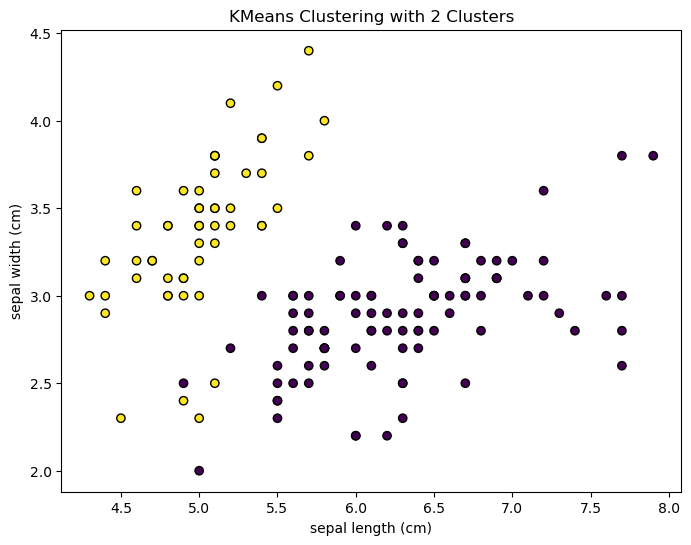

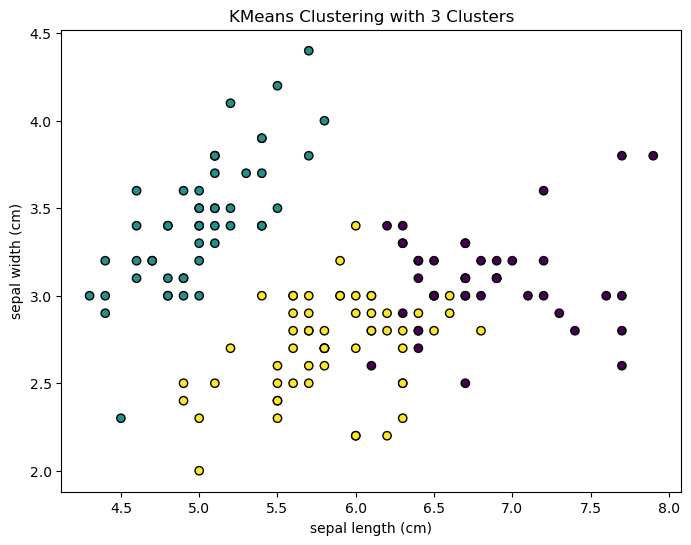

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 1. Iris 데이터 불러오기
iris = load_iris()
X = iris.data

# 2. 클러스터의 개수를 2개로 설정하고 KMeans 클러스터링 수행
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(X)
labels_2 = kmeans_2.labels_

# 3. 클러스터의 결과를 시각화 (2개의 클러스터)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_2, cmap='viridis', marker='o', edgecolor='k')
plt.title('KMeans Clustering with 2 Clusters')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

# 4. 클러스터의 개수를 3개로 설정하고 KMeans 클러스터링 수행
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(X)
labels_3 = kmeans_3.labels_

# 5. 클러스터의 결과를 시각화 (3개의 클러스터)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_3, cmap='viridis', marker='o', edgecolor='k')
plt.title('KMeans Clustering with 3 Clusters')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

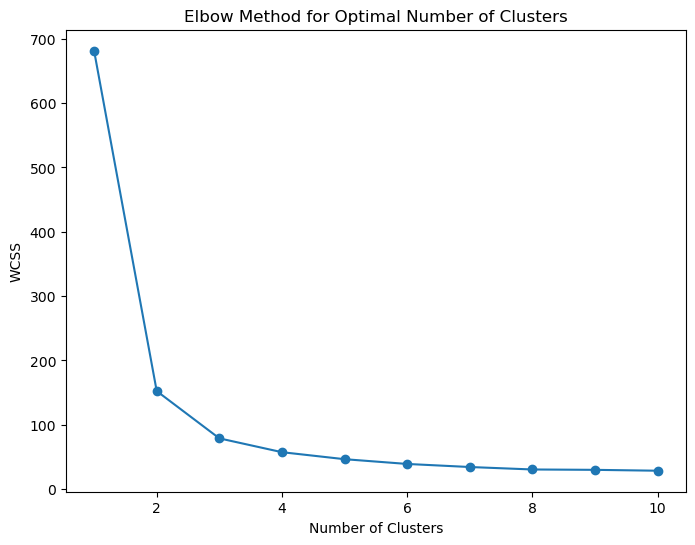

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 엘보우 방법을 사용하여 최적의 클러스터 개수를 찾기 위한 코드

# Iris 데이터 불러오기
iris = load_iris()
X = iris.data

# 다양한 클러스터 개수에 대해 WCSS (Within-Cluster Sum of Squares) 계산
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# WCSS 값을 이용한 엘보우 방법 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



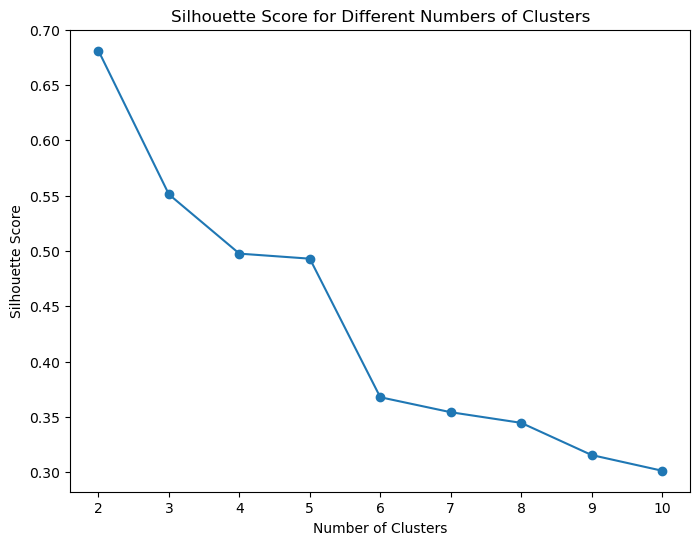

In [14]:
from sklearn.metrics import silhouette_score

# 다양한 클러스터 개수에 대해 실루엣 점수 계산
silhouette_scores = []
for i in range(2, 11):  # 클러스터 개수는 2개부터 시작
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# 실루엣 점수 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()



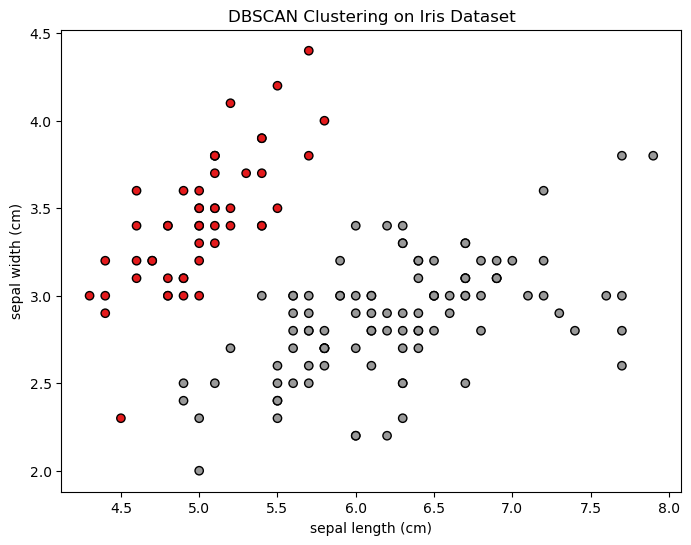

{0, 1}

In [15]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Iris 데이터 불러오기
iris = load_iris()
X = iris.data

# DBSCAN 클러스터링 수행
dbscan = DBSCAN(eps=1, min_samples=3)
labels = dbscan.fit_predict(X)

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.Set1,  marker='o', edgecolor='k')
plt.title('DBSCAN Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

# 클러스터링 결과 확인
unique_labels = set(labels)
unique_labels



In [16]:
import copy

# 원본 리스트
original_list = [[1, 2, 3], [4, 5, 6]]

# 깊은 복사
deep_copied_list = copy.deepcopy(original_list)

# 내부 리스트의 요소 변경
deep_copied_list[0][0] = 99

print("원본 리스트:", original_list)
print("깊은 복사 리스트:", deep_copied_list)


원본 리스트: [[1, 2, 3], [4, 5, 6]]
깊은 복사 리스트: [[99, 2, 3], [4, 5, 6]]


In [17]:
import xgboost as XGBClassifier


In [18]:
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X2_train, y2_train)


NameError: name 'xgb' is not defined

In [ ]:
y2_pred = xgb_model.predict(X2_test)
f1_2 = f1_score(y2_test, y2_pred)
f1_2

0.9473684210526316